In [1]:
import pandas as pd
st_df = pd.read_csv('StudentsPerformance.csv')
st_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [6]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [7]:
st_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
st_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
st_df.shape

(1000, 8)

So, there is no missing values and data seem clean initially.

Some Tricky and Deeply Analysis

In [10]:
# The linked between the parents education to highest math's score---So it's a master's degree with 69.74 with some point difference with bachelor's one

average_scores = st_df.groupby('parental level of education')['math score'].mean().sort_values(ascending=False)
print(average_scores)

parental level of education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math score, dtype: float64


In [11]:
# The average score difference between males and females across all subjects.
average_scores = st_df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(average_scores)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


Score improvement from completing test preparation course:
math score       5.617649
reading score    7.359587
writing score    9.914322
dtype: float64


Matplotlib is building the font cache; this may take a moment.


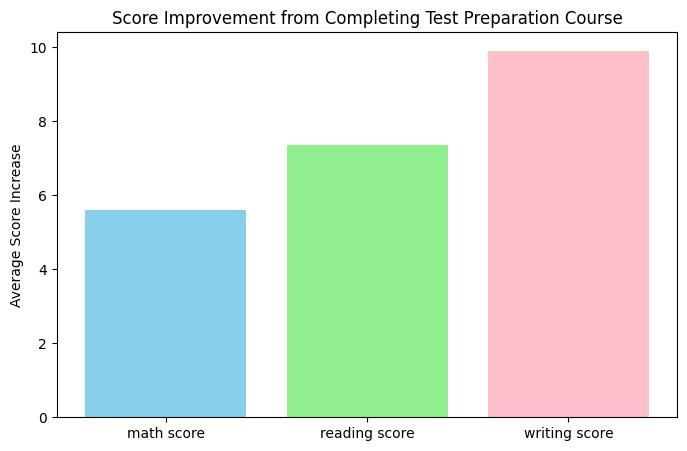

In [14]:
# Improvement in course score by completing test preparation. So the best avg score is for writing.

#Group by test preparation to find average scores.
avg_scores_prep = st_df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

improvement = avg_scores_prep.loc['completed'] - avg_scores_prep.loc['none']
print("Score improvement from completing test preparation course:")
print(improvement)

# Visual Gragh
import matplotlib.pyplot as plt

subjects = ['math score', 'reading score', 'writing score']
improvements = improvement.values

plt.figure(figsize=(8,5))
plt.bar(subjects, improvements, color=['skyblue', 'lightgreen', 'pink'])
plt.title('Score Improvement from Completing Test Preparation Course')
plt.ylabel('Average Score Increase')
plt.show()


In [20]:
# Combination of lunch, test prepartion, and gender that produce top 10% scores.
st_df['overall_score'] = st_df[['math score', 'reading score', 'writing score']].mean(axis=1)

# To calculate cutoff for top 10%
top_10_cutoff = st_df['overall_score'].quantile(0.90)

#Filtering student with overall scores >= cutoff
top10_df = st_df[st_df['overall_score'] >= top_10_cutoff]

combination_counts = top10_df.groupby(['gender', 'lunch', 'test preparation course']).size()
combination_counts = combination_counts.sort_values(ascending=False)
print(combination_counts)

gender  lunch         test preparation course
female  standard      none                       31
                      completed                  29
male    standard      completed                  20
                      none                        9
female  free/reduced  completed                   6
male    free/reduced  completed                   3
female  free/reduced  none                        2
male    free/reduced  none                        2
dtype: int64


In [16]:
# To check correlation between reading score and writing score
corr_read_write = st_df['reading score'].corr(st_df['writing score'])
print(f"Correlation between reading and writing scores: {corr_read_write:.3f}")

# To check correlation between math score and writing score
corr_math_write = st_df['math score'].corr(st_df['writing score'])
print(f"Correlation between math and writing scores: {corr_math_write:.3f}")

Correlation between reading and writing scores: 0.955
Correlation between math and writing scores: 0.803


In [17]:
# Does lunch type have a uniform impact across all race/ethnicity groups                      
st_df['overall_score'] = st_df[['math score', 'reading score', 'writing score']].mean(axis=1)
avg_scores_lunch_race = st_df.groupby(['race/ethnicity', 'lunch'])['overall_score'].mean().reset_index()


pivot_table = avg_scores_lunch_race.pivot(index='race/ethnicity', columns='lunch', values='overall_score')
pivot_table['difference'] = pivot_table['standard'] - pivot_table['free/reduced']
print(pivot_table)

lunch           free/reduced   standard  difference
race/ethnicity                                     
group A            57.657407  66.616352    8.958945
group B            60.975845  68.030303    7.054458
group C            60.412281  70.868293   10.456012
group D            64.666667  71.746507    7.079840
group E            67.495935  74.929293    7.433358


In [18]:
# Identifying top 5% students perofrmance and their Demographic profiles.
st_df['overall_score'] = st_df[['math score', 'reading score', 'writing score']].mean(axis=1)
top_5_cutoff = st_df['overall_score'].quantile(0.95)
print(f"Top 5% cutoff from overall score: {top_5_cutoff}")
top_5_students = st_df[st_df['overall_score'] >= top_5_cutoff]

# ANalyzing top 5% students demographic profile

# Gender
print("Gender Profile:")
for category, count in top_5_students['gender'].value_counts().items():
    print(f"{category}: {count}")

# Race/Ethnicity
print("\nRace/ethnicity:")
for category, count in top_5_students['race/ethnicity'].value_counts().items():
    print(f"{category}: {count}")

print("\nLunch type:")
for category, count in top_5_students['lunch'].value_counts().items():
    print(f"{category}: {count}")


# Parental education
print("\nParental level of education:")
for category, count in top_5_students['parental level of education'].value_counts().items():
    print(f"{category}: {count}")

# Test prep course
print("\nTest preparation course:")
for category, count in top_5_students['test preparation course'].value_counts().items():
    print(f"{category}: {count}")

Top 5% cutoff from overall score: 90.01666666666665
Gender Profile:
female: 36
male: 14

Race/ethnicity:
group E: 14
group C: 13
group D: 12
group B: 7
group A: 4

Lunch type:
standard: 46
free/reduced: 4

Parental level of education:
associate's degree: 16
bachelor's degree: 13
some college: 10
master's degree: 6
some high school: 3
high school: 2

Test preparation course:
completed: 33
none: 17


In [19]:
# Clustring Students into Performance Category (Low, High, Medium) and it is possible by assigning each student into category based on their overall_score
st_df['overall_score'] = st_df[['math score', 'reading score', 'writing score']].mean(axis=1)
def score_category(score):
    if score < 60:
        return 'Low'
    elif score < 80:
        return 'Medium'
    else:
        return 'High'

st_df['performance_category'] = st_df['overall_score'].apply(score_category)
print(st_df['performance_category'].value_counts())


performance_category
Medium    517
Low       285
High      198
Name: count, dtype: int64


In [21]:
# # df.to_excel('cleaned_data.xlsx', index=False)

st_df.to_csv('Students_cleaned_data.csv', index=False)